In [4]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.ticker import *
from tqdm import tqdm_notebook as tqdm
sns.set()

In [5]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.ticker import *
from tqdm import tqdm_notebook as tqdm
sns.set()
#Pythonでフォルダ内のファイルリストを取得する
#https://qiita.com/amowwee/items/e63b3610ea750f7dba1b

csv_list = glob.glob('C:\\Users\\Admin\\Desktop\V12100160_20200701-20200801\\*.csv')
site_info = pd.read_csv('C:\\Users\\Admin\\Desktop\\site_information.csv')

traffic_arate = []

for i in tqdm(range(len(csv_list))):
    if i == 0 :
        csv_data_percentage = pd.read_csv(csv_list[i]).drop(columns=['bandwidth',
                                                          'time-throughput(send)',
                                                          'time-throughput(receive)'])
        csv_data = pd.read_csv(csv_list[i]).drop(columns=['bandwidth',
                                                          'time-busyline(send)',
                                                          'time-busyline(receive)'])        

        site_name = site_info[site_info['circuit_ID'] == csv_list[i][-32:-22]]['Site_name'].values.astype(str)
        csv_data.columns = ['DATE',
                            site_name[0]+'send(throughput)',
                            site_name[0]+'receive(throughput)']
        csv_data_percentage.columns = ['DATE',
                            site_name[0]+'send(throughput)',
                            site_name[0]+'receive(throughput)',]
        csv_data['DATE'] = pd.to_datetime(csv_data['DATE'])
        
    else :
        csv_app_data_percentage = pd.read_csv(csv_list[i]).drop(columns=['DATE',
                                                                         'bandwidth',
                                                                         'time-throughput(send)',
                                                                         'time-throughput(receive)'])
        
        csv_app_data = pd.read_csv(csv_list[i]).drop(columns=['DATE',
                                                              'bandwidth',
                                                              'time-busyline(send)',
                                                              'time-busyline(receive)'])  
        site_name = site_info[site_info['circuit_ID'] == csv_list[i][-32:-22]]['Site_name'].values.astype(str)
        csv_app_data.columns = [site_name[0]+'send(throughput)',
                                site_name[0]+'receive(throughput)']
        csv_app_data_percentage.columns = [site_name[0]+'send(throughput)',
                                           site_name[0]+'receive(throughput)']  
        csv_data = pd.concat([csv_data, csv_app_data], axis=1)
        csv_data_percentage = pd.concat([csv_data_percentage, csv_app_data_percentage], axis=1)

display(csv_data.head())
display(csv_data_percentage.head())

,DATE,横浜支店send(throughput),横浜支店receive(throughput),京都支店send(throughput),京都支店receive(throughput),札幌統轄支店send(throughput),札幌統轄支店receive(throughput),東京支店send(throughput),東京支店receive(throughput),福岡支店send(throughput),...,代官町ビル#1send(throughput),代官町ビル#1receive(throughput),ＦＩＣ ＵＮＯ接続 ＧＡsend(throughput),ＦＩＣ ＵＮＯ接続 ＧＡreceive(throughput),甲府寮send(throughput),甲府寮receive(throughput),初台#1send(throughput),初台#1receive(throughput),ＦＩＣ ＵＮＯ接続 ＧＡsend(throughput),ＦＩＣ ＵＮＯ接続 ＧＡreceive(throughput)
0,2020-07-01 00:00:00,18316.24,30319.04,11264.13,3183.493,15622.88,3870.640,24360.19,7123.413,18715.570,...,1778.160,1286892.0,1155367.0,1751411.0,4241.067,1889.520,16332500.0,2405658.0,16338.560,28233.87
1,2020-07-01 00:05:00,21824.88,37803.36,12852.88,3471.013,18114.77,5189.813,20776.99,5817.040,10744.910,...,4094.587,1576429.0,359812.2,1273651.0,4194.773,1870.000,574751.8,787147.4,11537.890,21678.03
2,2020-07-01 00:10:00,20521.79,39531.31,11691.15,3222.160,16880.43,5348.773,22759.36,6203.627,8847.227,...,2439.707,1225108.0,304375.6,879705.7,3580.027,1948.880,2028415.0,746287.8,7900.427,15413.92
3,2020-07-01 00:15:00,19350.43,37269.84,11359.76,3041.147,14934.11,4262.453,23944.83,6406.347,9576.107,...,3229.653,1246520.0,336555.2,792874.1,4103.707,1770.373,303383.0,397581.8,7625.253,14920.16
4,2020-07-01 00:20:00,19651.23,37531.95,10853.15,3136.800,16456.48,4443.627,22542.85,6214.480,10982.610,...,2063.840,1271627.0,380361.1,530244.7,4129.013,1847.440,260338.0,611179.0,5871.840,14194.53


,DATE,横浜支店send(throughput),横浜支店receive(throughput),京都支店send(throughput),京都支店receive(throughput),札幌統轄支店send(throughput),札幌統轄支店receive(throughput),東京支店send(throughput),東京支店receive(throughput),福岡支店send(throughput),...,代官町ビル#1send(throughput),代官町ビル#1receive(throughput),ＦＩＣ ＵＮＯ接続 ＧＡsend(throughput),ＦＩＣ ＵＮＯ接続 ＧＡreceive(throughput),甲府寮send(throughput),甲府寮receive(throughput),初台#1send(throughput),初台#1receive(throughput),ＦＩＣ ＵＮＯ接続 ＧＡsend(throughput),ＦＩＣ ＵＮＯ接続 ＧＡreceive(throughput)
0,2020/07/01 00:00,0.061054,0.101064,0.112641,0.031835,0.052076,0.012902,0.081201,0.023745,0.062385,...,0.005927,4.289640,0.385122,0.583804,0.042411,0.018895,8.166249,1.202829,0.016339,0.028234
1,2020/07/01 00:05,0.072750,0.126011,0.128529,0.034710,0.060383,0.017299,0.069257,0.019390,0.035816,...,0.013649,5.254762,0.119937,0.424550,0.041948,0.018700,0.287376,0.393574,0.011538,0.021678
2,2020/07/01 00:10,0.068406,0.131771,0.116912,0.032222,0.056268,0.017829,0.075865,0.020679,0.029491,...,0.008132,4.083693,0.101459,0.293235,0.035800,0.019489,1.014207,0.373144,0.007900,0.015414
3,2020/07/01 00:15,0.064501,0.124233,0.113598,0.030411,0.049780,0.014208,0.079816,0.021354,0.031920,...,0.010766,4.155068,0.112185,0.264291,0.041037,0.017704,0.151692,0.198791,0.007625,0.014920
4,2020/07/01 00:20,0.065504,0.125107,0.108532,0.031368,0.054855,0.014812,0.075143,0.020715,0.036609,...,0.006879,4.238758,0.126787,0.176748,0.041290,0.018474,0.130169,0.305590,0.005872,0.014195


In [3]:
a = 193
display(csv_data.iloc[:,[0,a,a+1]].head(0))
#display(csv_data.iloc[:,[0,a,a+1]].describe())
yokohama = csv_data.iloc[:,[0,a,a+1]]
#yokohama['diff_send', 'diff_receive'] = csv_data.iloc[:,1:3].diff()
#yokohama = pd.concat([yokohama,csv_data.iloc[:,1:3].diff()], axis=1)
yokohama = pd.concat([yokohama,csv_data.iloc[:,[a,a+1]].rolling(2).agg([lambda x:np.log(max(x)-min(x))])], axis=1)
#yokohama['ratio_send', 'ratio_receive'] = csv_data.iloc[:,1:3].pct_change()
yokohama = pd.concat([yokohama,csv_data.iloc[:,[a,a+1]].pct_change()], axis=1)
yokohama = pd.concat([yokohama,csv_data.iloc[:,[a,a+1]].rolling(12).mean().fillna(0)], axis=1)
yokohama.columns = ['DATE','横浜支店send(throughput)','横浜支店receive(throughput)','横浜支店send(diff)',
                    '横浜支店receive(diff)','横浜支店send(ratio)','横浜支店receive(ratio)',
                    '横浜支店receive(ave)','横浜支店send(ave)']
#display(yokohama.head())

plt.plot(yokohama.iloc[:,1], label=yokohama.columns[1])
#plt.plot(yokohama.iloc[:,3], label=yokohama.columns[3])
#plt.plot(yokohama.iloc[:,5]*100, label=yokohama.columns[5])
#plt.plot(yokohama.iloc[:,7], label=yokohama.columns[7])
plt.legend()
plt.show()

plt.plot(yokohama.iloc[0:2016,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[2016:4032,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[4032:6048,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[6048:8064,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[8064:8928,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.show()

fig, ax1 = plt.subplots()
ax1.hist(np.log(yokohama.iloc[:,1]+0.0000001),bins=100, label='normal', color='red')
#ax1.hist(yokohama.iloc[:,1],bins=100, label='normal', color='red')
ax2 = ax1.twinx()
ax2.hist(np.log(yokohama.iloc[:,1]+0.0000001),bins=100, cumulative=True, label='cumulative', histtype='step')
#ax2.hist(yokohama.iloc[:,1],bins=100, cumulative=True, label='cumulative', histtype='step')
plt.legend()
plt.show()

IndexError: positional indexers are out-of-bounds

In [ ]:
sns.pairplot(csv_data.iloc[:,1:])
plt.show()

No handles with labels found to put in legend.


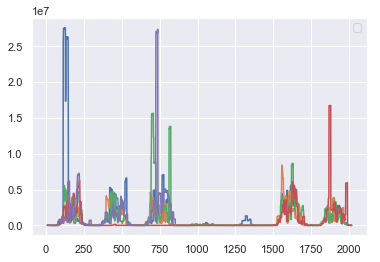

In [34]:
#for i in range(0,8928,2016):
plt.plot(yokohama.iloc[0:2016,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[2016:4032,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[4032:6048,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[6048:8064,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.plot(yokohama.iloc[8064:8928,1].rolling(12).agg([lambda x:(max(x)-min(x))]).reset_index(drop=True))
plt.legend()
plt.show()

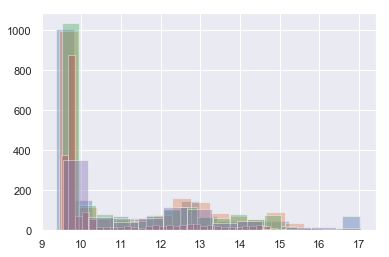

In [26]:
sns.distplot(np.log(yokohama.iloc[0:2016,1].values), kde=False)
sns.distplot(np.log(yokohama.iloc[2016:4032,1].values), kde=False)
sns.distplot(np.log(yokohama.iloc[4032:6048,1].values), kde=False)
sns.distplot(np.log(yokohama.iloc[6048:8064,1].values), kde=False)
sns.distplot(np.log(yokohama.iloc[8064:8928,1].values), kde=False)
plt.show()
             

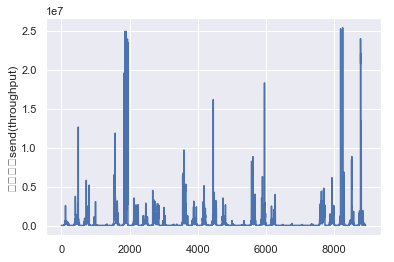

In [27]:
sns.lineplot(x=yokohama.index, y='横浜支店send(throughput)', data=yokohama)

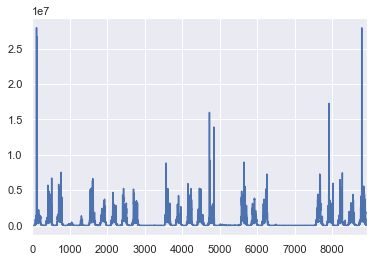

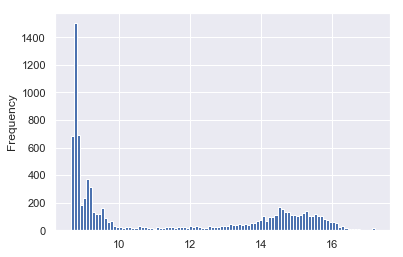

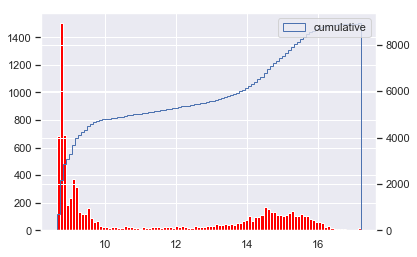

In [35]:
yokohama.iloc[:,1].plot.line()
plt.show()

np.log(yokohama.iloc[:,2]).plot.hist(bins=100)
plt.show()

fig, ax1 = plt.subplots()
ax1.hist(np.log(yokohama.iloc[:,2]),bins=100, label='normal', color='red')
ax2 = ax1.twinx()
ax2.hist(np.log(yokohama.iloc[:,2]),bins=100, cumulative=True, label='cumulative', histtype='step')
plt.legend()
plt.show()


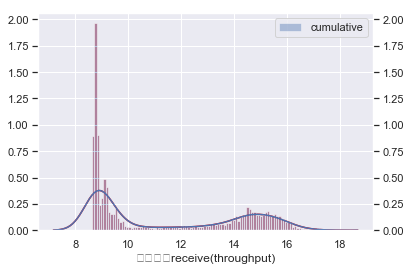

In [36]:
fig, ax1 = plt.subplots()
ax1 = sns.distplot(np.log(yokohama.iloc[:,2]),bins=100, label='normal', color='red')
ax2 = ax1.twinx()
sns.distplot(np.log(yokohama.iloc[:,2]),bins=100, label='cumulative', ax=ax2)
#ax2.hist(np.log(yokohama.iloc[:,2]),bins=100, cumulative=True, label='cumulative', histtype='step')
plt.legend()
plt.show()

,0,1
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


,0,1
195,195,195
196,196,196
197,197,197
198,198,198
199,199,199


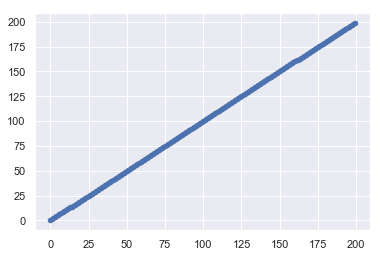

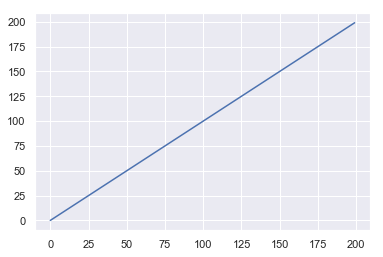

In [12]:
x = range(0,200,1)
y= x

test_data = pd.DataFrame([x,y]).T
display(test_data.head())
display(test_data.tail())

plt.scatter(x,y,s=20)
plt.show()

plt.plot(x,y)
plt.show()




8929


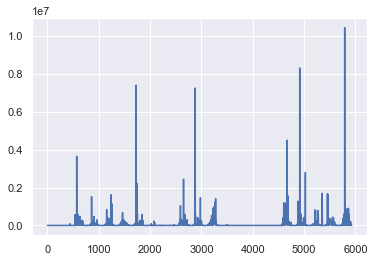

In [37]:
from sklearn.neighbors import NearestNeighbors

knn_vector_n = []
knn_vector_n1 = []
dist_vec = []
indi_vec = []
print(len(yokohama))
for i in tqdm(range(0,len(yokohama)-3000)):
    knn_vector_n = []
    knn_vector_n1 = []
    knn_vector_n.append(yokohama.iloc[i:i+3000,1:3].values.flatten())
    knn_vector_n = np.array(knn_vector_n).reshape(-1,2)
    knn_vector_n1.append(yokohama.iloc[i+3000,1:3].values.flatten())
    knn_vector_n1 = np.array(knn_vector_n1).reshape(-1,2)
    #print(knn_vector.shape)
    #print(knn_vector)
    KNN = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(knn_vector_n)
    distance, indices = KNN.kneighbors(knn_vector_n1)
    dist_vec.append(distance)
    indi_vec.append(indices)
    
#knn_vector = np.array(knn_vector).reshape(-1,100)
#KNN = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(knn_vector)
#distance, indices = KNN.kneighbors(knn_vector)
dist_vec = pd.Series(np.array(dist_vec).flatten())
plt.plot(dist_vec)
plt.show()

In [86]:
from sklearn.neighbors import NearestNeighbors

knn_vector_n = []
knn_vector_n1 = []
dist_vec = []
indi_vec = []

for i in tqdm(range(0,len(test_data)-9)):
    knn_vector_n = []
    knn_vector_n1 = []
    knn_vector_n = test_data.iloc[i:i+9,0:2].values.reshape(-1,2)
    knn_vector_n1 = test_data.iloc[i+9,0:2].values.reshape(-1,2)

    KNN = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(knn_vector_n)
    distance, indices = KNN.kneighbors(knn_vector_n1)
    dist_vec.append(distance)
    indi_vec.append(indices)
    
dist_vec = pd.Series(np.array(dist_vec).flatten())
print(dist_vec)
print(indi_vec)




0      1.414214
1      1.414214
2      1.414214
3      1.414214
4      1.414214
5      1.414214
6      1.414214
7      1.414214
8      1.414214
9      1.414214
10     1.414214
11     1.414214
12     1.414214
13     1.414214
14     1.414214
15     1.414214
16     1.414214
17     1.414214
18     1.414214
19     1.414214
20     1.414214
21     1.414214
22     1.414214
23     1.414214
24     1.414214
25     1.414214
26     1.414214
27     1.414214
28     1.414214
29     1.414214
         ...   
161    1.414214
162    1.414214
163    1.414214
164    1.414214
165    1.414214
166    1.414214
167    1.414214
168    1.414214
169    1.414214
170    1.414214
171    1.414214
172    1.414214
173    1.414214
174    1.414214
175    1.414214
176    1.414214
177    1.414214
178    1.414214
179    1.414214
180    1.414214
181    1.414214
182    1.414214
183    1.414214
184    1.414214
185    1.414214
186    1.414214
187    1.414214
188    1.414214
189    1.414214
190    1.414214
Length: 191, dtype: flo

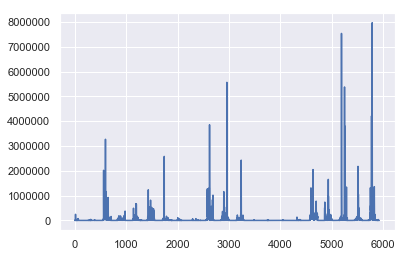

In [32]:
plt.plot(dist_vec)
plt.show()